In [1]:
!pip install -q pandas numpy scikit-learn matplotlib seaborn wordcloud


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re


In [3]:
data = {
    "post": [
        "I'm really feeling hopeless these days.",
        "Had a great day at the beach with friends!",
        "Thinking about giving up...",
        "Enjoyed the new Marvel movie!",
        "I can’t handle this stress anymore.",
        "Work has been fun and challenging lately.",
        "I feel alone and exhausted all the time.",
        "Excited to start my new job next week!"
    ],
    "label": [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Concern, 0 = Not Concern
}

df = pd.DataFrame(data)
df.head()


,post,label
0,I'm really feeling hopeless these days.,1
1,Had a great day at the beach with friends!,0
2,Thinking about giving up...,1
3,Enjoyed the new Marvel movie!,0
4,I can’t handle this stress anymore.,1


In [4]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove punctuation/numbers
    text = text.lower()
    return text

df['clean_post'] = df['post'].apply(clean_text)
df.head()


,post,label,clean_post
0,I'm really feeling hopeless these days.,1,im really feeling hopeless these days
1,Had a great day at the beach with friends!,0,had a great day at the beach with friends
2,Thinking about giving up...,1,thinking about giving up
3,Enjoyed the new Marvel movie!,0,enjoyed the new marvel movie
4,I can’t handle this stress anymore.,1,i cant handle this stress anymore


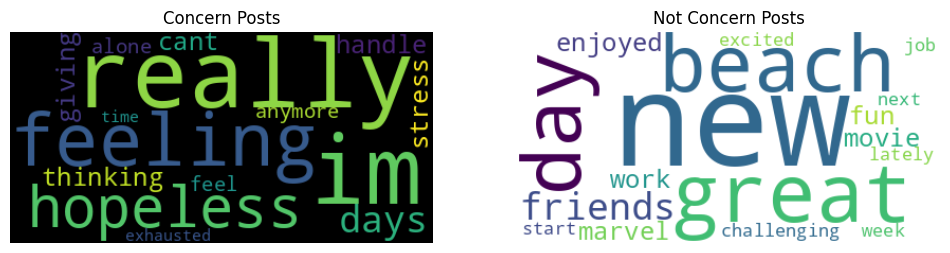

In [5]:
concern_posts = " ".join(df[df.label == 1]['clean_post'])
not_concern_posts = " ".join(df[df.label == 0]['clean_post'])

wc_concern = WordCloud(background_color="black", max_words=100).generate(concern_posts)
wc_not = WordCloud(background_color="white", max_words=100).generate(not_concern_posts)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_concern, interpolation='bilinear')
plt.title("Concern Posts")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wc_not, interpolation='bilinear')
plt.title("Not Concern Posts")
plt.axis("off")
plt.show()


In [6]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_post'])
y = df['label']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0

Confusion Matrix:
 [[0 2]
 [0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [9]:
def predict_post(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    result = model.predict(vectorized)
    return "Concern" if result[0] == 1 else "Not Concern"

# Try it
print(predict_post("I can't take this anymore"))
print(predict_post("I'm happy about the weekend"))


Concern
Concern
